### scikit-learn中的SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

X = X[y<2, :2]
y = y[y<2]

In [4]:
X.shape

(100, 2)

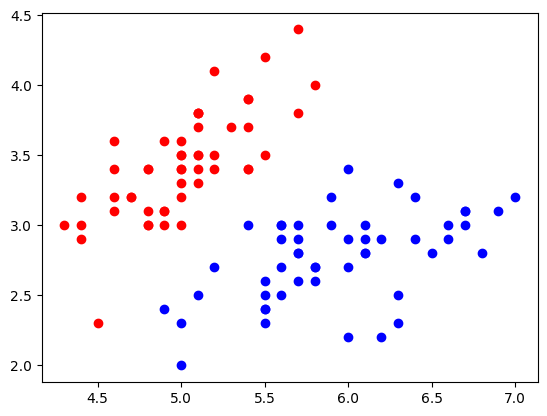

In [5]:
plt.scatter(X[y==0, 0], X[y==0, 1], color='red')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X)
standardScaler.transform(X)
X_standard = standardScaler.transform(X)

In [10]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1e9, dual='auto')
svc.fit(X_standard, y)

LinearSVC(C=1000000000.0, dual='auto')

In [11]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF0A0A', '#FFF59D', '#90CAD9'])
    
    plt.contourf(x0, x1, zz, linewidths=5, cmap=custom_cmap)

C:\Users\wh\AppData\Local\Temp\ipykernel_18092\812169963.py:14: UserWarning: linewidths is ignored by contourf
  plt.contourf(x0, x1, zz, linewidths=5, cmap=custom_cmap)


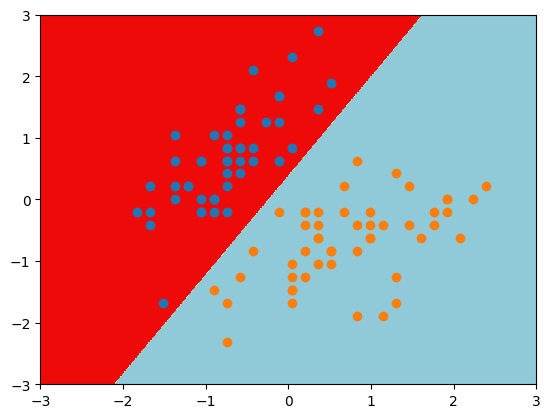

In [13]:
plot_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0,1])
plt.scatter(X_standard[y==1, 0], X_standard[y==1,1])
plt.show()

In [14]:
svc2 = LinearSVC(C=0.01, dual='auto')
svc2.fit(X_standard, y)

LinearSVC(C=0.01, dual='auto')

C:\Users\wh\AppData\Local\Temp\ipykernel_18092\812169963.py:14: UserWarning: linewidths is ignored by contourf
  plt.contourf(x0, x1, zz, linewidths=5, cmap=custom_cmap)


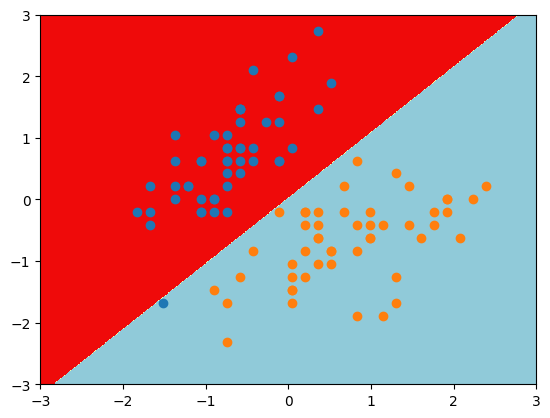

In [15]:
plot_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0,1])
plt.scatter(X_standard[y==1, 0], X_standard[y==1,1])
plt.show()

In [16]:
svc.coef_

array([[ 4.03251658, -2.50704823]])

In [17]:
svc.intercept_

array([0.92736842])

In [18]:
def plot_svc_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF0A0A', '#FFF59D', '#90CAD9'])
    
    plt.contourf(x0, x1, zz, linewidths=5, cmap=custom_cmap)

    w = model.coef_[0]
    b = model.intercept_[0]
    # w0 * x0 + w1 * x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/w[1] * plot_x - b/w[1] + 1/w[1]
    down_y = -w[0]/w[1] * plot_x - b/w[1] - 1/w[1]

    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    plt.plot(plot_x[up_index], up_y[up_index], color='black')
    plt.plot(plot_x[down_index], down_y[down_index], color='black')

C:\Users\wh\AppData\Local\Temp\ipykernel_18092\517641776.py:14: UserWarning: linewidths is ignored by contourf
  plt.contourf(x0, x1, zz, linewidths=5, cmap=custom_cmap)


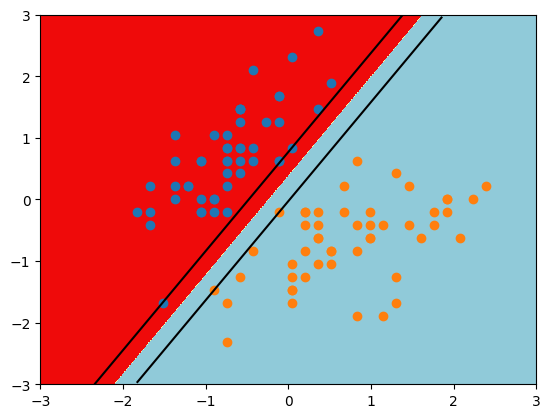

In [20]:
plot_svc_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0,1])
plt.scatter(X_standard[y==1, 0], X_standard[y==1,1])
plt.show()

C:\Users\wh\AppData\Local\Temp\ipykernel_18092\517641776.py:14: UserWarning: linewidths is ignored by contourf
  plt.contourf(x0, x1, zz, linewidths=5, cmap=custom_cmap)


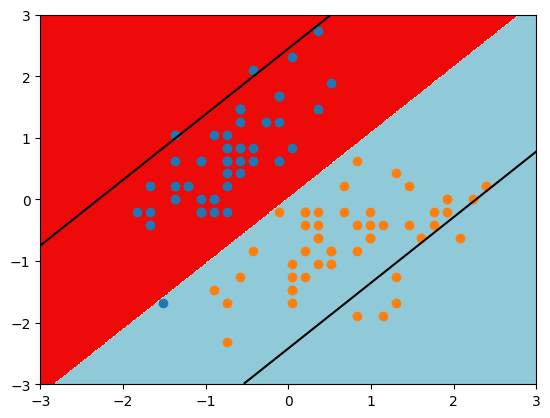

In [21]:
plot_svc_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0,1])
plt.scatter(X_standard[y==1, 0], X_standard[y==1,1])
plt.show()